# Parkinson Detection with Audio classification


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
data = pd.read_csv('pd_speech_features.csv')
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [85]:
data.shape

(756, 753)

In [54]:
data = data.drop(['id','gender'], axis=1)

Input = data.drop('class', axis=1)
Output = data['class']

In [55]:
corr = data.corr()
print(corr)

                                PPE       DFA      RPDE  numPulses  \
PPE                        1.000000 -0.094775 -0.405558   0.191535   
DFA                       -0.094775  1.000000  0.155075  -0.286791   
RPDE                      -0.405558  0.155075  1.000000  -0.521193   
numPulses                  0.191535 -0.286791 -0.521193   1.000000   
numPeriodsPulses           0.194098 -0.286611 -0.524839   0.999917   
...                             ...       ...       ...        ...   
tqwt_kurtosisValue_dec_33  0.045755 -0.033914 -0.097161  -0.047946   
tqwt_kurtosisValue_dec_34  0.046175  0.043454 -0.036406  -0.068664   
tqwt_kurtosisValue_dec_35  0.037385  0.067843 -0.018052  -0.069645   
tqwt_kurtosisValue_dec_36  0.039588  0.116699  0.021945  -0.062925   
class                     -0.072939  0.306070  0.247444  -0.284056   

                           numPeriodsPulses  meanPeriodPulses  \
PPE                                0.194098         -0.201907   
DFA                          

In [36]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, data[col].unique())

<AxesSubplot:>

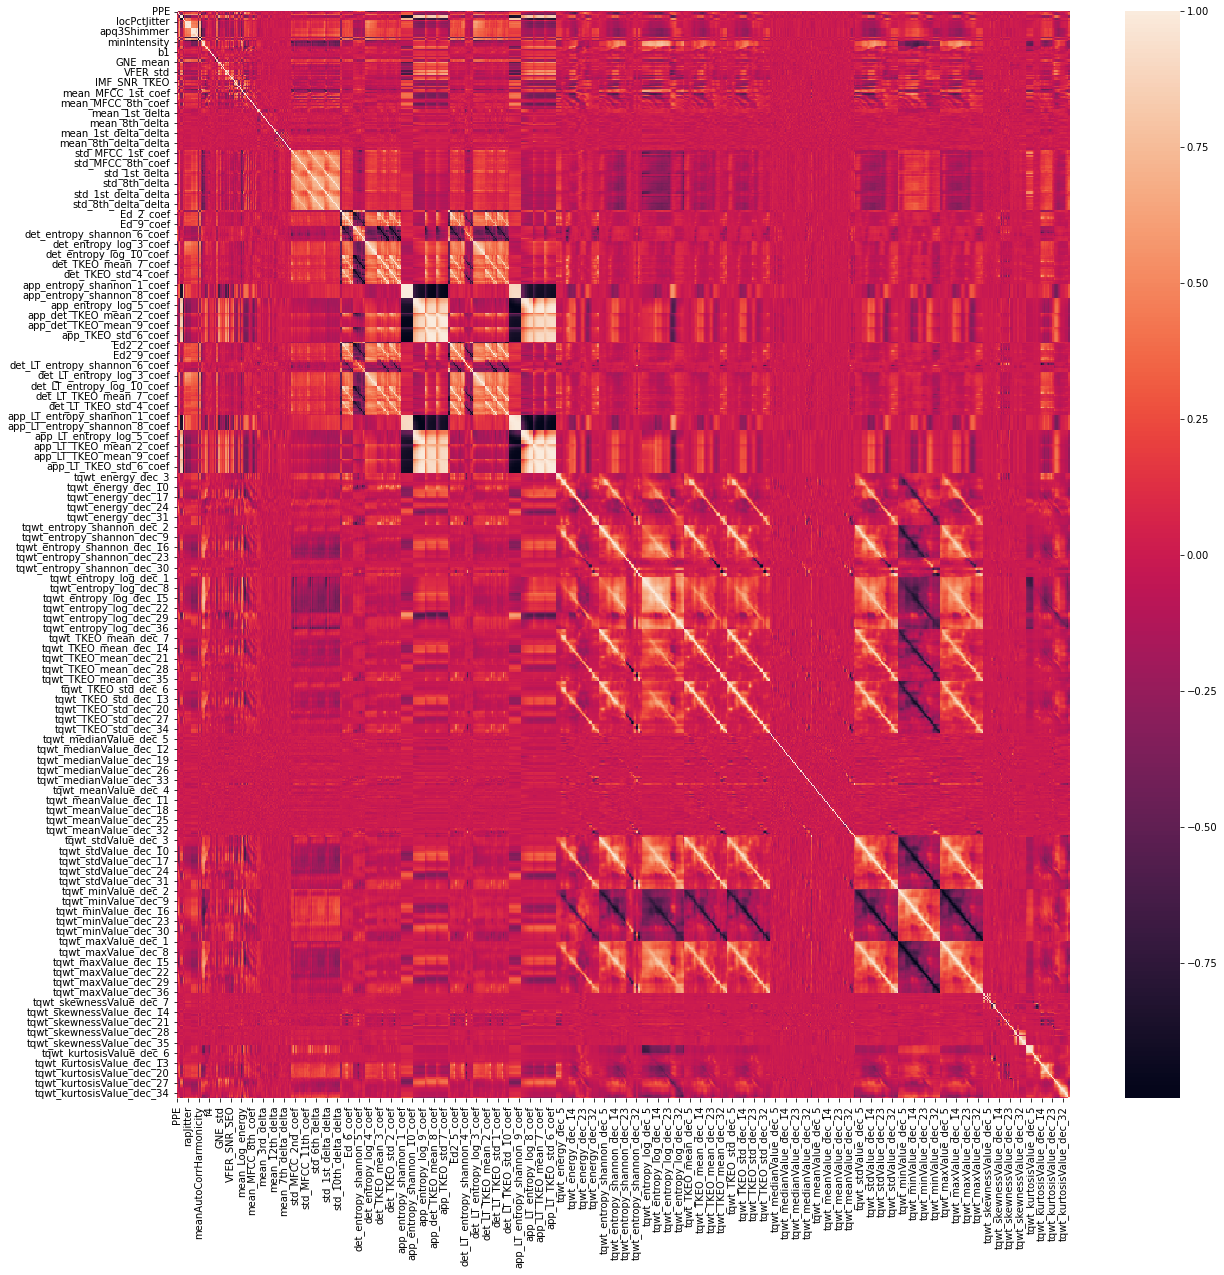

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

In [57]:
from sklearn.model_selection import train_test_split


x_train, x_test ,y_train, y_test = train_test_split(Input, Output, random_state=43)

In [58]:
Input

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,0.00008,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
752,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,0.00016,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170
753,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,0.00011,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
754,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,0.00017,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


In [59]:
x_train.shape

(567, 752)

In [60]:
x_test.shape

(189, 752)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Dense(64, input_dim=752, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                48192     
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 50,433
Trainable params: 50,369
Non-trainable params: 64
_________________________________________________________________


In [77]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
15/15 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.7660 - val_loss: 0.6045 - val_accuracy: 0.6930
Epoch 2/5
15/15 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7770 - val_loss: 0.5795 - val_accuracy: 0.7018
Epoch 3/5
15/15 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7704 - val_loss: 0.5886 - val_accuracy: 0.7193
Epoch 4/5
15/15 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7638 - val_loss: 0.6758 - val_accuracy: 0.6579
Epoch 5/5
15/15 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7594 - val_loss: 0.6466 - val_accuracy: 0.6667


In [99]:
loss, accuracy = model.evaluate(x_train, y_train)

print(f'\nTrainging Accuracy = {accuracy*100}')

18/18 [==============================] - 0s 763us/step - loss: 0.6461 - accuracy: 0.6790

Trainging Accuracy = 67.90123581886292


In [97]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'\nTesting Accuracy = {accuracy*100}')

6/6 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.7566

Testing Accuracy = 75.66137313842773


In [80]:
y_predict = model.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

0.014416483713234896


# History Plot for Accuracy

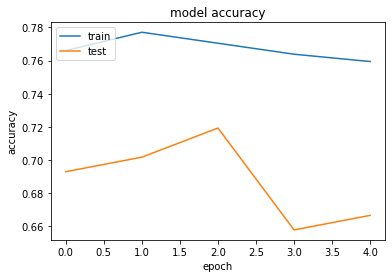

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy_of_BasicNetwork.png')
plt.show()
# summarize history for loss


# History for Loss

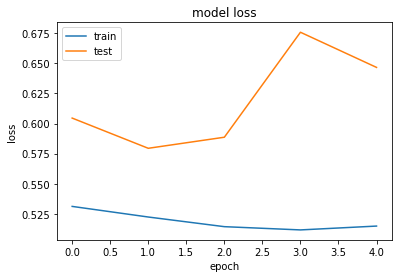

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss_of_BasicNetwork.png')
plt.show()
